In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.2


'cuda'

In [2]:
df = pd.read_csv("/kaggle/input/data-provided/train.csv")
print("Full train dataset shape is {}".format(df.shape))
df

Full train dataset shape is (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


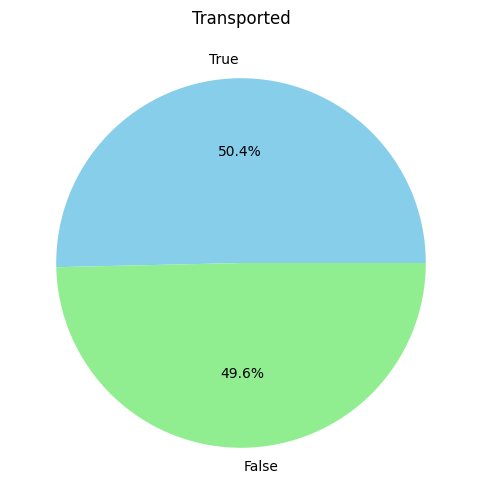

In [4]:
transported_counts = df['Transported'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(transported_counts, labels=transported_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Transported')
plt.show()

In [5]:
print(df.describe())
print(df.info())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 co

In [6]:
df = df.drop(['Name'], axis=1)
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
PassengerId       0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [8]:
df['Transported'] = df['Transported'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [9]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
df = df.drop('Cabin', axis=1)
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S
8691,9280_01,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S


In [10]:
from sklearn.model_selection import train_test_split
numeric_df = df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
print(numeric_df)

X = numeric_df.drop(columns=['Transported'])
y = numeric_df['Transported']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into Pytorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

      CryoSleep  VIP  FoodCourt  ShoppingMall     Spa  VRDeck  Transported
0             0    0        0.0           0.0     0.0     0.0            0
1             0    0        9.0          25.0   549.0    44.0            1
2             0    1     3576.0           0.0  6715.0    49.0            0
3             0    0     1283.0         371.0  3329.0   193.0            0
4             0    0       70.0         151.0   565.0     2.0            1
...         ...  ...        ...           ...     ...     ...          ...
8688          0    1     6819.0           0.0  1643.0    74.0            0
8689          1    0        0.0           0.0     0.0     0.0            0
8690          0    0        0.0        1872.0     1.0     0.0            1
8691          0    0     1049.0           0.0   353.0  3235.0            0
8692          0    0     4688.0           0.0     0.0    12.0            1

[8693 rows x 7 columns]


Epoch [10/200], Loss: 5.6628, Accuracy: 0.7303
Epoch [20/200], Loss: 5.7962, Accuracy: 0.7205
Epoch [30/200], Loss: 4.4286, Accuracy: 0.7274
Epoch [40/200], Loss: 2.9058, Accuracy: 0.7211
Epoch [50/200], Loss: 1.9425, Accuracy: 0.7217
Epoch [60/200], Loss: 1.3846, Accuracy: 0.7211
Epoch [70/200], Loss: 1.0659, Accuracy: 0.7401
Epoch [80/200], Loss: 0.8553, Accuracy: 0.7303
Epoch [90/200], Loss: 0.7480, Accuracy: 0.7349
Epoch [100/200], Loss: 0.7365, Accuracy: 0.7389
Epoch [110/200], Loss: 0.6859, Accuracy: 0.7464
Epoch [120/200], Loss: 0.7870, Accuracy: 0.6699
Epoch [130/200], Loss: 1.1812, Accuracy: 0.7401
Epoch [140/200], Loss: 0.8078, Accuracy: 0.7533
Epoch [150/200], Loss: 0.7294, Accuracy: 0.7424
Epoch [160/200], Loss: 0.7700, Accuracy: 0.7510
Epoch [170/200], Loss: 1.2830, Accuracy: 0.7464
Epoch [180/200], Loss: 0.8735, Accuracy: 0.7545
Epoch [190/200], Loss: 0.6779, Accuracy: 0.7292
Epoch [200/200], Loss: 1.0527, Accuracy: 0.6998
Best Accuracy: 0.7642


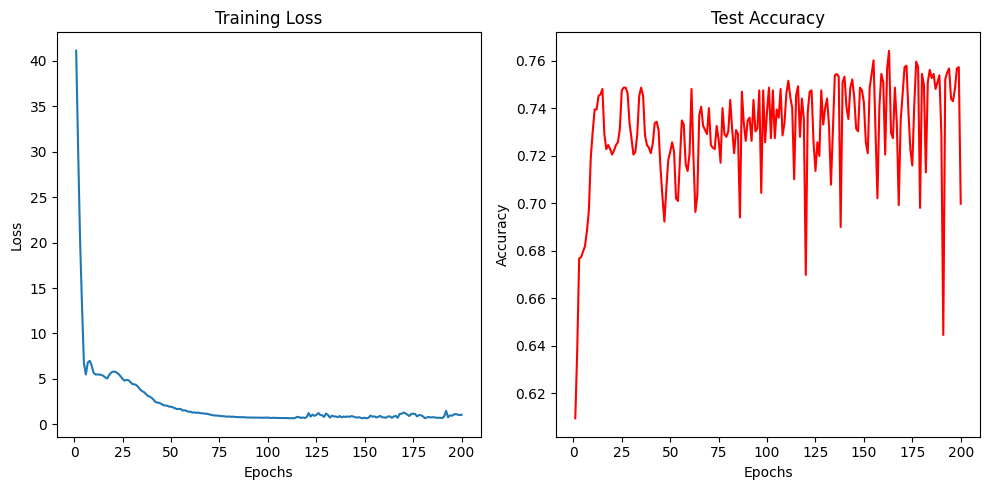

In [11]:
# I used a Feedforward Neural Networks model (FNNs) to train my data

import torch.optim as optim
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

y_train = y_train.long()
y_test = y_test.long()

class FFN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FFN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
input_size = X_train.shape[1]
hidden_size = 128
num_classes = 2
num_epochs = 200
best_accuracy = 0.0

# Initialize the FNN model
model = FFN(input_size, hidden_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loss_values = []
test_accuracy_values = []

# Training loop
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy on test set
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        _, predicted = torch.max(test_outputs, 1)
        y_test_trimmed = y_test[:len(predicted)]  # Trim y_test to match the length of predicted
        test_accuracy = accuracy_score(y_test_trimmed, predicted)
    
    train_loss_values.append(loss.item())
    test_accuracy_values.append(test_accuracy)
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {test_accuracy:.4f}')
        
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        
print(f'Best Accuracy: {best_accuracy:.4f}')

plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), test_accuracy_values, label='Test Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')

plt.tight_layout()
plt.show()

Epoch [1/200], Avg Loss: 0.5985, Accuracy: 0.6862
Epoch [11/200], Avg Loss: 0.5415, Accuracy: 0.7315
Epoch [21/200], Avg Loss: 0.5461, Accuracy: 0.7252
Epoch [31/200], Avg Loss: 0.5394, Accuracy: 0.7364
Epoch [41/200], Avg Loss: 0.5276, Accuracy: 0.7403
Epoch [51/200], Avg Loss: 0.5150, Accuracy: 0.7565
Epoch [61/200], Avg Loss: 0.5192, Accuracy: 0.7660
Epoch [71/200], Avg Loss: 0.5047, Accuracy: 0.7660
Epoch [81/200], Avg Loss: 0.5084, Accuracy: 0.7653
Epoch [91/200], Avg Loss: 0.5015, Accuracy: 0.7643
Epoch [101/200], Avg Loss: 0.5018, Accuracy: 0.7660
Epoch [111/200], Avg Loss: 0.5004, Accuracy: 0.7672
Epoch [121/200], Avg Loss: 0.4994, Accuracy: 0.7682
Epoch [131/200], Avg Loss: 0.5004, Accuracy: 0.7672
Epoch [141/200], Avg Loss: 0.4959, Accuracy: 0.7698
Epoch [151/200], Avg Loss: 0.4945, Accuracy: 0.7689
Epoch [161/200], Avg Loss: 0.5054, Accuracy: 0.7712
Epoch [171/200], Avg Loss: 0.4960, Accuracy: 0.7670
Epoch [181/200], Avg Loss: 0.5009, Accuracy: 0.7680
Epoch [191/200], Avg Lo

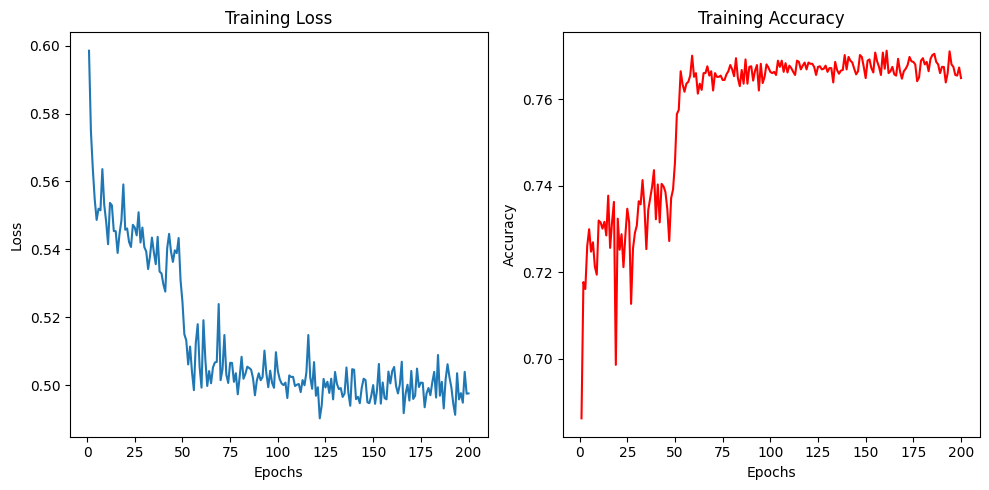

In [12]:
# In order to reduce loss, and increase accuracy, I will be incorporating
# the learning rate scheduling concept and batch normalization

from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
hidden_size = 256
num_classes = 2
model = FFNN(input_size, hidden_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Learning rate scheduling
scheduler = StepLR(optimizer, step_size=50, gamma=0.15)

dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset, batch_size=256, shuffle=True)

# Training loop
num_epochs = 200
best_accuracy = 0.0
losses = []
accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_samples += targets.size(0)
        total_correct += (predicted == targets).sum().item()
        total_loss += loss.item()
        
    scheduler.step()
    
    avg_loss = total_loss / len(train_loader)
    accuracy = total_correct / total_samples
    
    losses.append(avg_loss)
    accuracies.append(accuracy)
    
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy

print(f'Best Accuracy: {best_accuracy:.4f}')

plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), accuracies, label='Training Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

Epoch [1/200], Avg Loss: 0.6668, Accuracy: 0.6647
Epoch [11/200], Avg Loss: 0.5419, Accuracy: 0.7206
Epoch [21/200], Avg Loss: 0.5435, Accuracy: 0.7210
Epoch [31/200], Avg Loss: 0.5303, Accuracy: 0.7449
Epoch [41/200], Avg Loss: 0.5369, Accuracy: 0.7391
Epoch [51/200], Avg Loss: 0.5447, Accuracy: 0.7374
Epoch [61/200], Avg Loss: 0.5013, Accuracy: 0.7634
Epoch [71/200], Avg Loss: 0.5054, Accuracy: 0.7639
Epoch [81/200], Avg Loss: 0.4928, Accuracy: 0.7663
Epoch [91/200], Avg Loss: 0.5021, Accuracy: 0.7601
Epoch [101/200], Avg Loss: 0.4957, Accuracy: 0.7640
Epoch [111/200], Avg Loss: 0.4931, Accuracy: 0.7675
Epoch [121/200], Avg Loss: 0.4916, Accuracy: 0.7698
Epoch [131/200], Avg Loss: 0.4929, Accuracy: 0.7688
Epoch [141/200], Avg Loss: 0.4912, Accuracy: 0.7689
Epoch [151/200], Avg Loss: 0.4872, Accuracy: 0.7729
Epoch [161/200], Avg Loss: 0.4888, Accuracy: 0.7698
Epoch [171/200], Avg Loss: 0.4879, Accuracy: 0.7703
Epoch [181/200], Avg Loss: 0.4902, Accuracy: 0.7695
Epoch [191/200], Avg Lo

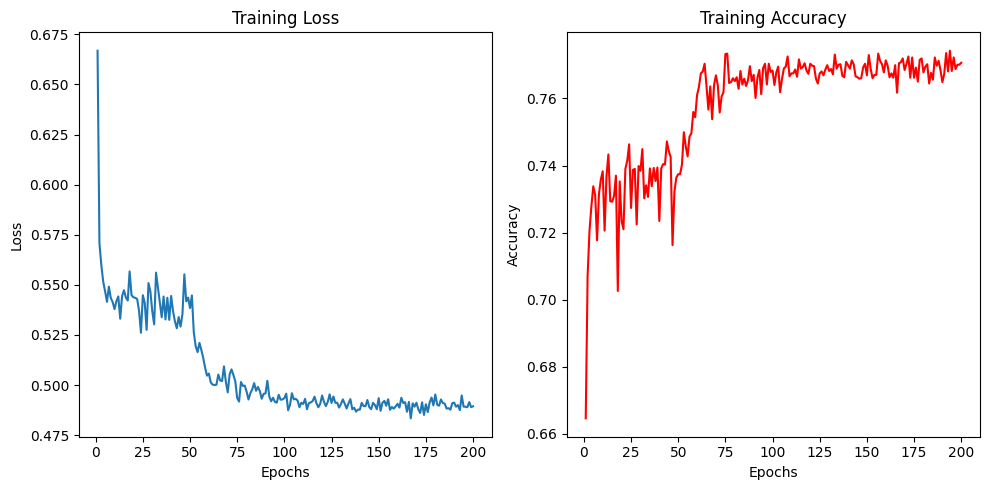

In [13]:
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_prob=0.3):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Increased model capacity
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
hidden_size = 448
num_classes = 2
dropout_prob = 0.3
model = FFNN(input_size, hidden_size, num_classes, dropout_prob)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Learning rate scheduling
scheduler = StepLR(optimizer, step_size=50, gamma=0.15)

dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset, batch_size=512, shuffle=True)

# Training loop
num_epochs = 200
best_accuracy = 0.0
losses = []
accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        total_samples += targets.size(0)
        total_correct += (predicted == targets).sum().item()
        total_loss += loss.item()
        
    scheduler.step()
    
    avg_loss = total_loss / len(train_loader)
    accuracy = total_correct / total_samples
    
    losses.append(avg_loss)
    accuracies.append(accuracy)
    
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy

print(f'Best Accuracy: {best_accuracy:.4f}')

plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), accuracies, label='Training Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load the test dataset
test_df = pd.read_csv('/kaggle/input/data-provided/test.csv')
submission_id = test_df.PassengerId

test_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
processed_test_df = test_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

X_test = torch.tensor(processed_test_df.values, dtype=torch.float32)

test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

predictions = []
model.eval()
with torch.no_grad():
    for inputs in test_loader:
        outputs = model(inputs[0])
        _, predicted = torch.max(outputs, 1)
        predictions.extend([bool(pred) for pred in predicted])
        
output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': predictions})

output


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


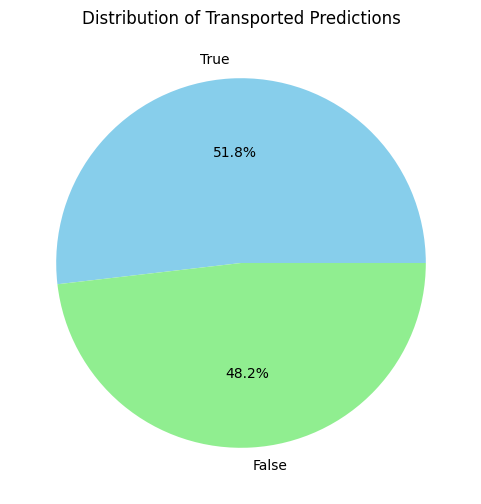

In [15]:
transported_counts = output['Transported'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(transported_counts, labels=['True', 'False'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Transported Predictions')
plt.show()


In [16]:
sample_submission_df = pd.read_csv('/kaggle/input/data-provided/sample_submission.csv')
sample_submission_df['Transported'] = predictions
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
